## This is an additional simple model with several different settings.
### Compared to "Scratch simple model", this model:
### - uses AdaGrad as optimizer (instead of rmsprop); 
### - adds one 0.2 dropout on input layer and one 0.5 dropout on hidden layer; 
### - only applies rescale to training image (instead of rescale, shear, zoom and horizontal flip)

### It shows better performance on training set and similar performance on testing set

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.optimizers import SGD

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Two-Genre Classification 
## Horror vs. Romance

In [8]:
img_width, img_height = 92,138

train_data_dir = 'horror_vs_romance/train'
validation_data_dir = 'horror_vs_romance/validation'
nb_train_samples = 800
nb_validation_samples = 200
epochs = 60
batch_size = 10
input_shape = (img_width, img_height, 3)

In [9]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='AdaGrad',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/60
80/80 [==============================] - 10s - loss: 0.7311 - acc: 0.5775 - val_loss: 0.6327 - val_acc: 0.6450
Epoch 2/60
80/80 [==============================] - 10s - loss: 0.6084 - acc: 0.7100 - val_loss: 0.5057 - val_acc: 0.7550
Epoch 3/60
80/80 [==============================] - 10s - loss: 0.5188 - acc: 0.7487 - val_loss: 0.4845 - val_acc: 0.7750
Epoch 4/60
80/80 [==============================] - 10s - loss: 0.4965 - acc: 0.7737 - val_loss: 0.4934 - val_acc: 0.7500
Epoch 5/60
80/80 [==============================] - 10s - loss: 0.4674 - acc: 0.7887 - val_loss: 0.4793 - val_acc: 0.7500
Epoch 6/60
80/80 [==============================] - 10s - loss: 0.4301 - acc: 0.8125 - val_loss: 0.4298 - val_acc: 0.8350
Epoch 7/60
80/80 [==============================] - 10s - loss: 0.3987 - acc: 0.8237 - val_loss: 0.4391 - val_acc: 0.7900
Epoch 8/60
80/80 [==============================] - 10s - loss: 

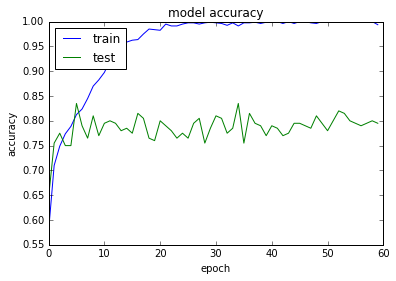

In [10]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

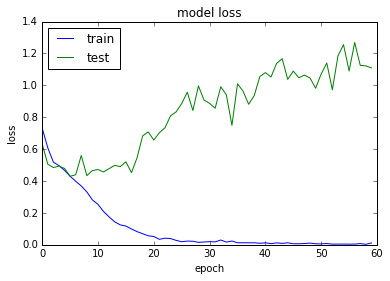

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Three-Genre Classification
## Horror vs. Romance vs. Scifi

In [12]:
img_width, img_height = 92,138

train_data_dir = 'horror_vs_romance_vs_scifi/train'
validation_data_dir = 'horror_vs_romance_vs_scifi/validation'
nb_train_samples = 1064
nb_validation_samples = 266
epochs = 60
batch_size = 10
input_shape = (img_width, img_height, 3)

In [13]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='AdaGrad',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 1064 images belonging to 3 classes.
Found 266 images belonging to 3 classes.
Epoch 1/60
106/106 [==============================] - 18s - loss: 1.1940 - acc: 0.4689 - val_loss: 0.9345 - val_acc: 0.6500
Epoch 2/60
106/106 [==============================] - 13s - loss: 0.9564 - acc: 0.5788 - val_loss: 0.9007 - val_acc: 0.6000
Epoch 3/60
106/106 [==============================] - 13s - loss: 0.9067 - acc: 0.5967 - val_loss: 0.8541 - val_acc: 0.6328
Epoch 4/60
106/106 [==============================] - 13s - loss: 0.9082 - acc: 0.6094 - val_loss: 0.8980 - val_acc: 0.6055
Epoch 5/60
106/106 [==============================] - 13s - loss: 0.8684 - acc: 0.6245 - val_loss: 0.8399 - val_acc: 0.6115
Epoch 6/60
106/106 [==============================] - 13s - loss: 0.8447 - acc: 0.6326 - val_loss: 0.8243 - val_acc: 0.6250
Epoch 7/60
106/106 [==============================] - 13s - loss: 0.8105 - acc: 0.6533 - val_loss: 0.8361 - val_acc: 0.6406
Epoch 8/60
106/106 [=============================

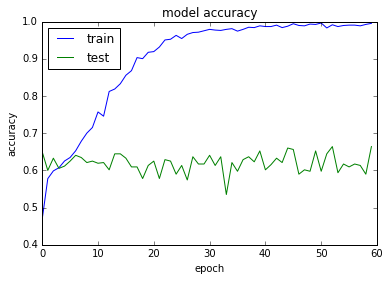

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

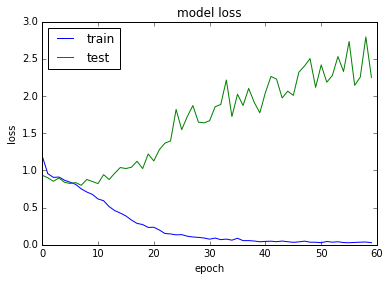

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')